## Download model

```
mkdir ~/gai/models/Stable-diffusion
huggingface-cli download runwayml/stable-diffusion-v1-5 \
    v1-5-pruned-emaonly.safetensors \
    --local-dir ~/gai/models/Stable-diffusion \
    --local-dir-use-symlinks False
```

## Install and run webui.

```
cd /external
git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git
cd stable-diffusion-webui
git reset --hard v1.9.3
pip install -r requirements_versions.txt

mkdir repositories && cd $_

git clone https://github.com/Stability-AI/stablediffusion.git stable-diffusion-stability-ai
cd stable-diffusion-stability-ai
git reset --hard cf1d67a6fd5ea1aa600c4df58e5b47da45f6bdbf
rm -rf .git && cd ..

git clone https://github.com/salesforce/BLIP.git BLIP
cd BLIP
git reset --hard 48211a1594f1321b00f14c9f7a5b4813144b2fb9
rm -rf .git && cd ..

git clone https://github.com/crowsonkb/k-diffusion.git k-diffusion
cd k-diffusion
git reset --hard ab527a9a6d347f364e3d185ba6d714e22d80cb3c
rm -rf .git && cd ..

git clone https://github.com/Stability-AI/generative-models generative-models
cd generative-models
git reset --hard 45c443b316737a4ab6e40413d7794a7f5657c19f
rm -rf .git && cd ..

git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui-assets stable-diffusion-webui-assets
cd stable-diffusion-webui-assets
git reset --hard 6f7db241d2f8ba7457bac5ca9753331f0c266917
rm -rf .git && cd ..

pip install pyngrok xformers==0.0.26.post1 \
  git+https://github.com/TencentARC/GFPGAN.git@8d2447a2d918f8eba5a4a01463fd48e45126a379 \
  git+https://github.com/openai/CLIP.git@d50d76daa670286dd6cacf3bcd80b5e4823fc8e1 \
  git+https://github.com/mlfoundations/open_clip.git@v2.20.0

cd models
rm -rf Stable-diffusion
ln -sf ~/gai/models/Stable-diffusion .

python -u webui.py --listen --port 12035 --api --xformers --medvram
```

## Inference

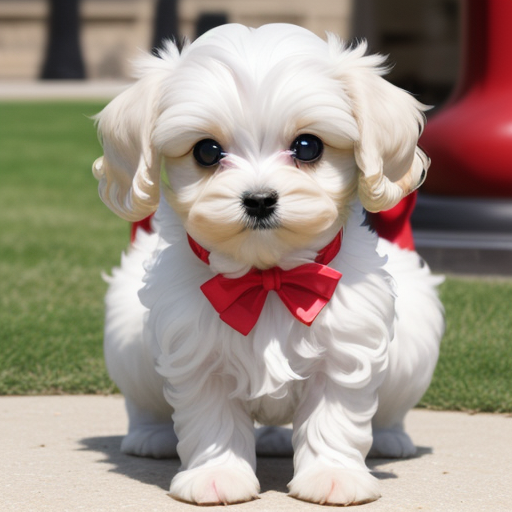

In [ ]:
import requests
import json, base64
data = {
    "prompt": "maltese puppy"
}    
response = requests.post('http://localhost:12035/sdapi/v1/txt2img',json=data)

import json,base64
base64_img = json.loads(response.content.decode("utf-8"))["images"][0]
image_data = base64.b64decode(base64_img)
from PIL import Image
from io import BytesIO
image = Image.open(BytesIO(image_data))
image